In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import os

In [2]:
df = pd.read_csv("C:/Users/Nano/VeriAnalizi/MLDays/Visualization/datasets_228_482_diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [14]:
df.isna().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [15]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df["Overweight"] = [1 if x > 25 else 0 for x in df.BMI]
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Overweight
0,6,148,72,35,0,33.6,0.627,50,1,1
1,1,85,66,29,0,26.6,0.351,31,0,1
2,8,183,64,0,0,23.3,0.672,32,1,0
3,1,89,66,23,94,28.1,0.167,21,0,1
4,0,137,40,35,168,43.1,2.288,33,1,1


# Relational Plots with Matplotlib
* **Scatter plot:** iki değişken arasındaki ilişkinin dağılımını gösterir.
* **Lineplot:** İki değişken arasındaki ilişkiyi sürekli gösterir. (Zaman serilerinde kullanılır)
* **s parametresi:** marker boyutu
* **c parametresi:** marker rengi, hangi değişkeni tuttuğu da yazılabilir
* **alpha:** marker opaklığı

In [11]:
plt.rcParams.update({'font.size': 25})

In [12]:
sns.set_context("paper")

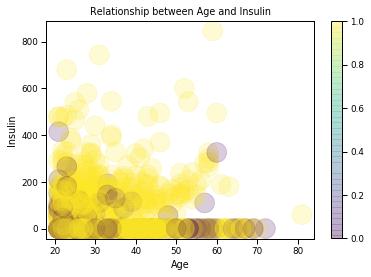

In [14]:
plt.scatter(df.Age, df.Insulin, c=df.Overweight, s=389,
            alpha=0.2, cmap="viridis") #cmap renk paleti
plt.colorbar(); #hangi rengin hangi değere denk geldiğini gösteren yandaki ölçek
plt.xlabel("Age") #eksen ismi
plt.ylabel("Insulin") 
plt.title("Relationship between Age and Insulin") #plot ismi
plt.show()

# Scatter plot with Subplots
* **fig, ax = plt.subplots():** figure ve axes object oluşturur. figure’de her şey var, axes data’yı tutuyor.

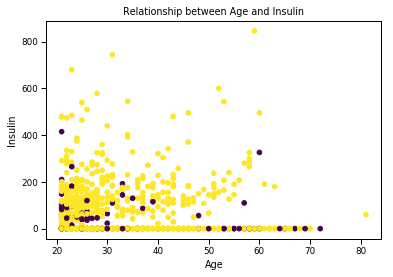

In [18]:
fig, ax = plt.subplots()
ax.scatter(df.Age, df.Insulin, c=df.Overweight, cmap="viridis")
ax.set_xlabel("Age")
ax.set_ylabel("Insulin")
ax.set_title("Relationship between Age and Insulin")
plt.show()

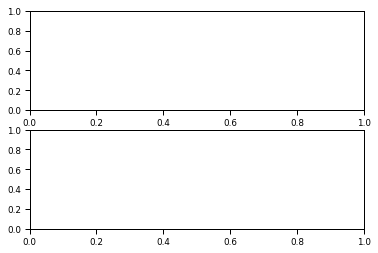

In [20]:
fig, ax = plt.subplots(2,1) # (2,2)
plt.show()

* **Histogram:** Numerik ya da kategorik verilerde dağılımı yorumlamamıza yardımcı olur.

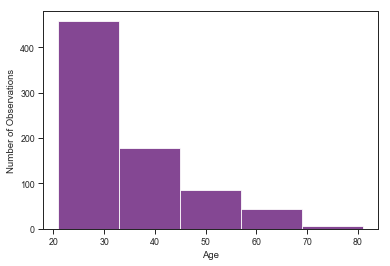

In [55]:
fig, ax = plt.subplots()
ax.hist(df.Age, label="Age", bins=5)  # bin : aralik sayilarini belirler.
ax.set_xlabel("Age")
ax.set_ylabel("Number of Observations")
plt.show()

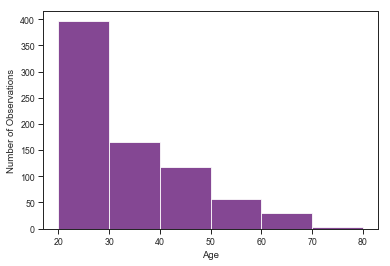

In [56]:
bins=[20, 30, 40, 50, 60, 70, 80]
fig, ax = plt.subplots()
ax.hist(df.Age, label="Age Bins", bins=bins)
ax.set_xlabel("Age")
ax.set_ylabel("Number of Observations")
plt.show()

**Bar plot:** Kategorik verinin özelliklerine bakmamızı sağlar.

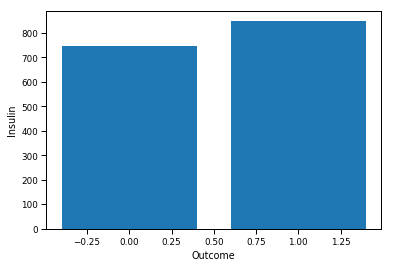

In [24]:
fig, ax = plt.subplots()
ax.bar(df.Outcome, df.Insulin)
ax.set_xlabel("Outcome")
ax.set_ylabel("Insulin")
plt.show()

# Kaydetme

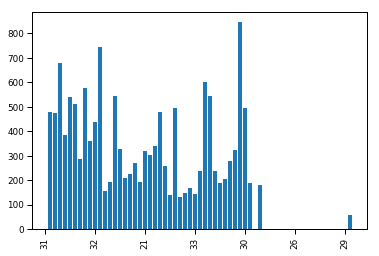

In [25]:
fig, ax = plt.subplots()
ax.bar(df.Age, df.Insulin)
ax.set_xticklabels(df.Age, rotation=90)
fig.savefig("Age.png")   # imagelari kaydedebilirlz.

* **fig.savefig(“Age.png”):** kayıp olmadan kaydeder, yüksek kalitelidir ama çok hafıza tutar. 
* **fig.savefig(“Age.jpg”, quality=50):** websitesine konulabilir. 
* **fig.savefig(“Age.png”, dpi=200):** dots per inch, dense rendering. 
* **fig.set_size_inches([5,3]):** aspect ratio

# Seaborn
* FacetGrid (relplot(), catplot()) subplotlar oluşturabilir
* AxesSubplot(scatterplot, countplot) bir tane plot oluşturur

# Count Plot

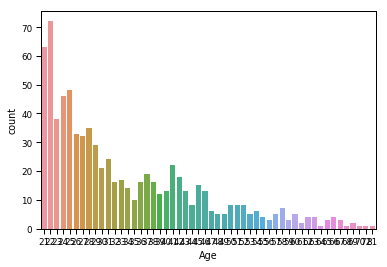

In [27]:
sns.set_palette("RdBu")
sns.countplot(x="Age", data=df)
plt.show()

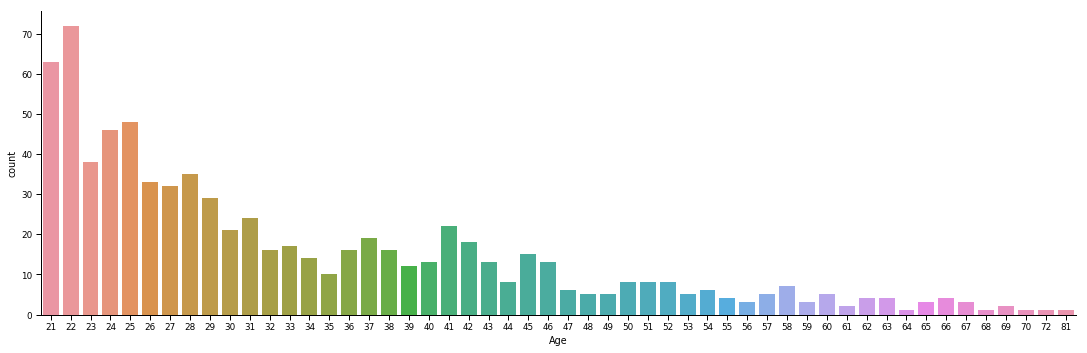

In [27]:
sns.catplot(x="Age", aspect=3, data=df, kind="count")
plt.show()
#aspect: x ekseni y ekseninin 3 kati kadar olsun diye ayarlanir/
#kind : hangi plotta cizilecegi yazilir, bar da kullanilabilir.

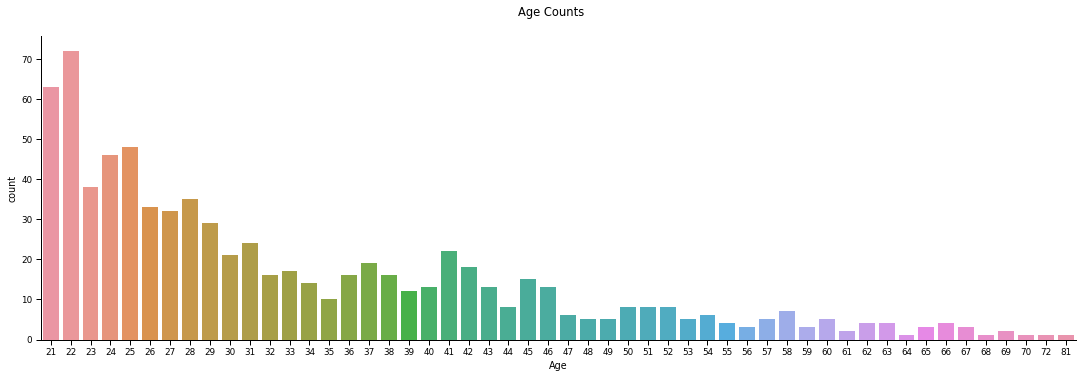

In [28]:
g = sns.catplot(x="Age", aspect=3, data=df, kind="count")
g.fig.suptitle("Age Counts", y=1.04) #ismi yukarı çıkarıyor
plt.show()

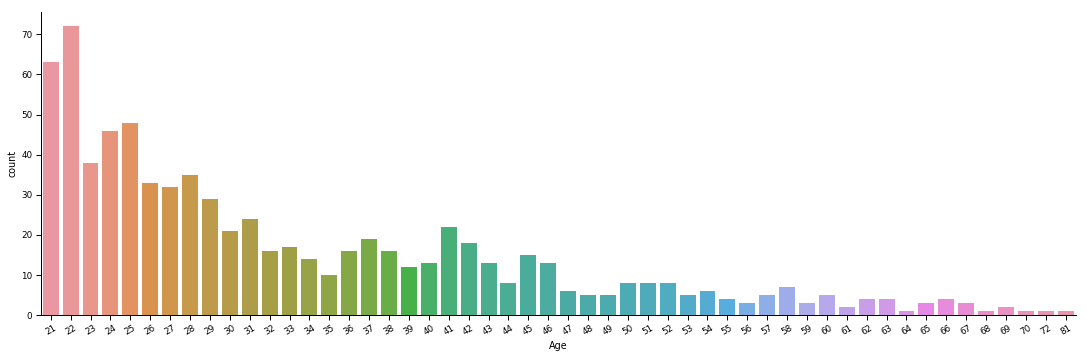

In [28]:
g = sns.catplot(x="Age", aspect=3, data=df, kind="count")
plt.xticks(rotation=30)
plt.show()

# Scatter plot

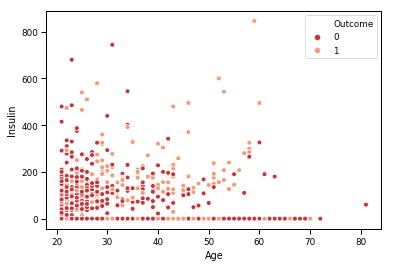

In [29]:
sns.scatterplot(x="Age", y="Insulin",data=df, hue="Outcome")
plt.show()

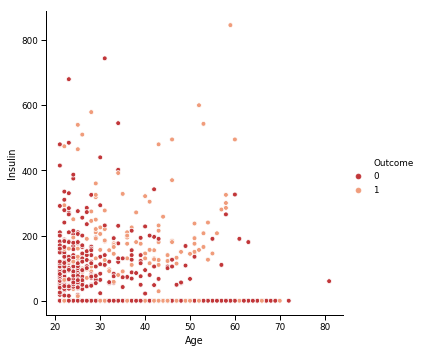

In [30]:
sns.relplot(x="Age", y="Insulin",data=df, hue="Outcome", 
            kind="scatter")
plt.show()

# Line plot

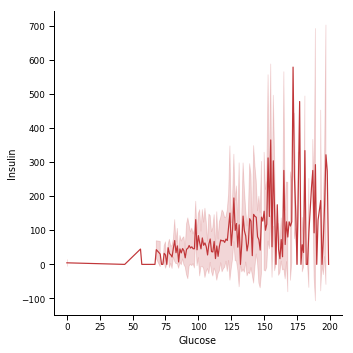

In [34]:
# zaman serilerinde kullanilabilir.
sns.relplot(x="Glucose", y="Insulin", data=df, kind="line", ci="sd", markers=True, dashes=False)
plt.show()

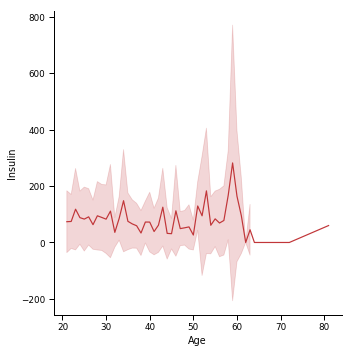

In [35]:
# zaman serilerinde kullanilabilir.
sns.relplot(x="Age", y="Insulin", data=df, kind="line", ci="sd", markers=True, dashes=False)
plt.show()

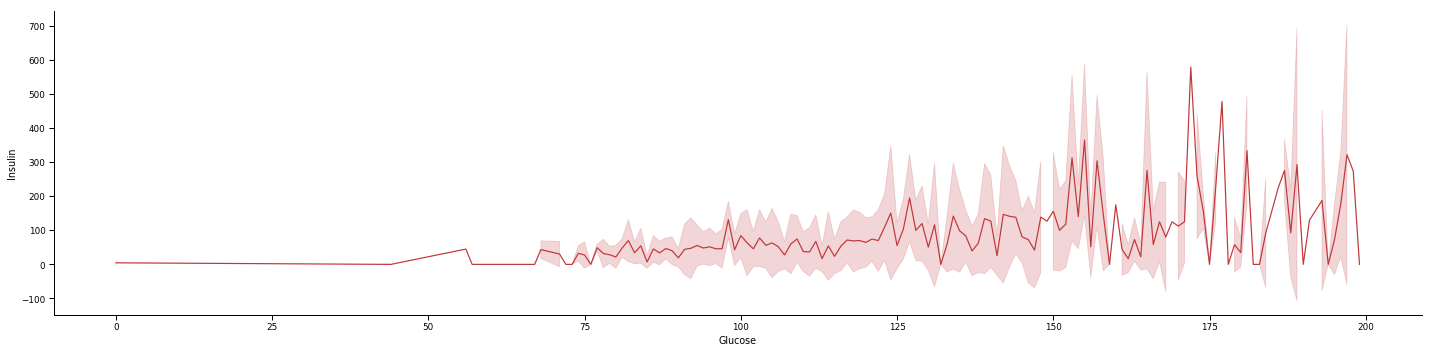

In [33]:
sns.relplot(x="Glucose", y="Insulin", data=df, kind="line", aspect=4, ci="sd")
plt.show()

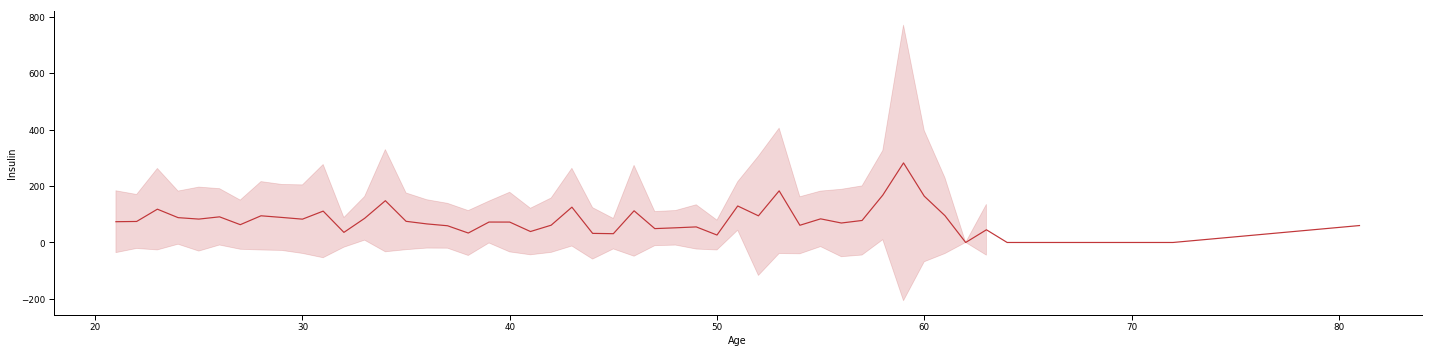

In [36]:
sns.relplot(x="Age", y="Insulin", data=df, kind="line", aspect=4, ci="sd")
plt.show()
# ci : ortalam ve standart sapma degerlerini golgeli olarak gosterir.

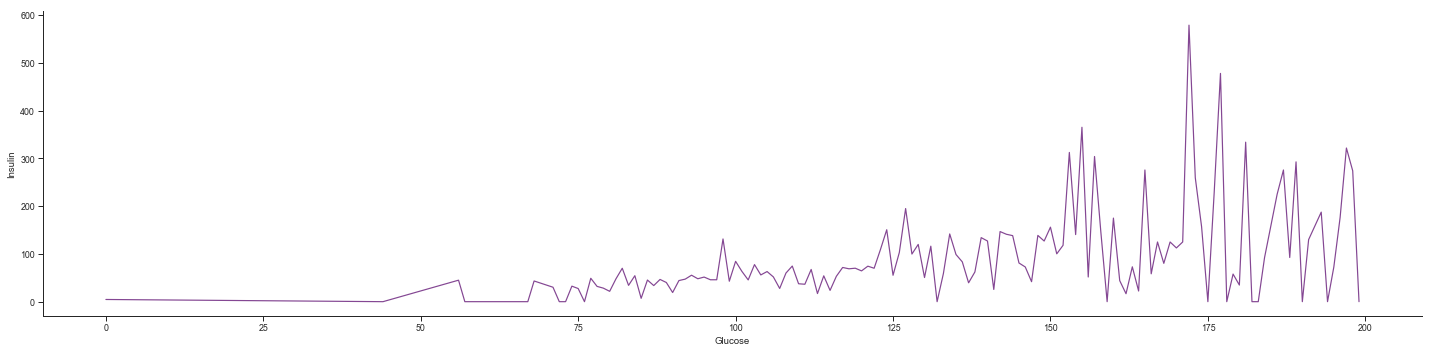

In [57]:
sns.relplot(x="Glucose", y="Insulin", data=df, kind="line", aspect=4, ci=None)
plt.show()

# Scatter Subplots

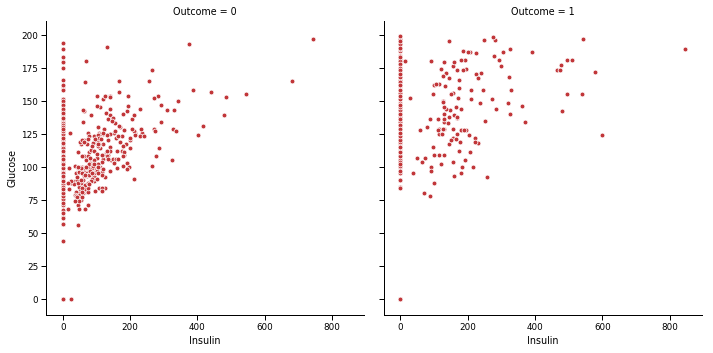

In [35]:
sns.relplot(x="Insulin", y="Glucose", data=df, kind="scatter", col="Outcome")
plt.show()

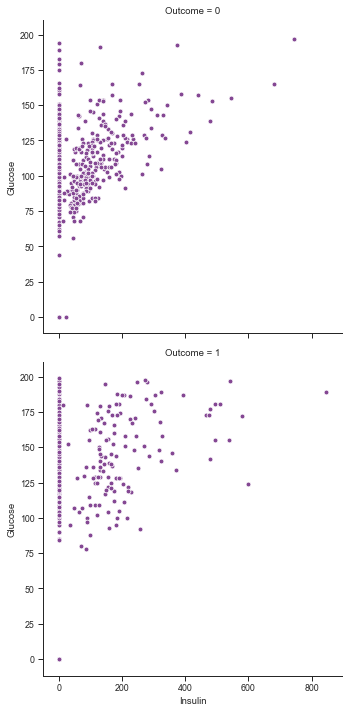

In [58]:
sns.relplot(x="Insulin", y="Glucose", data=df, kind="scatter", row="Outcome")
plt.show()

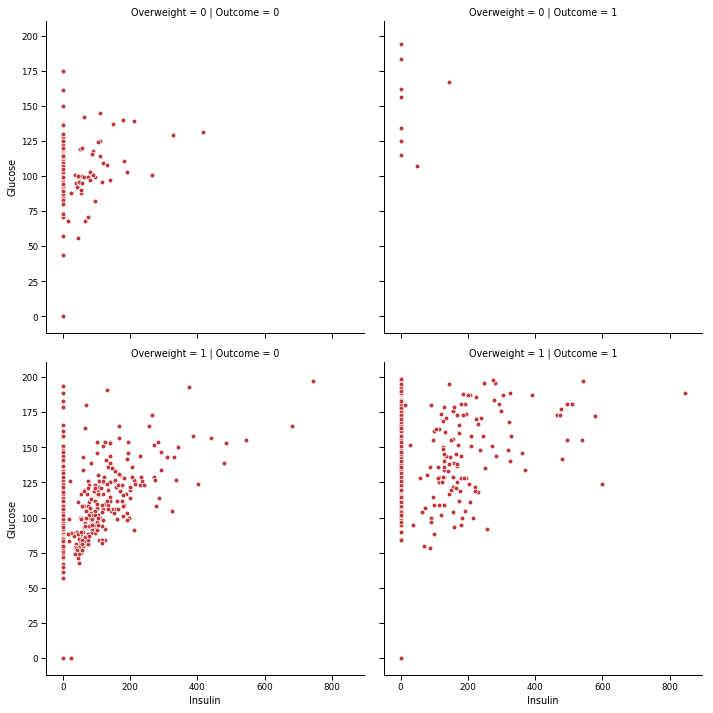

In [39]:
sns.relplot(x="Insulin", y="Glucose", data=df, kind="scatter", col="Outcome", row="Overweight")
plt.show()

# Heatmap

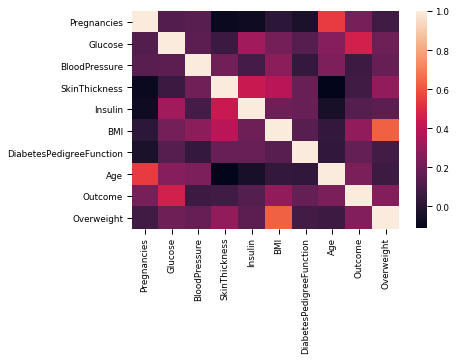

In [37]:
sns.set_palette("RdBu")
correlation=df.corr()
sns.heatmap(correlation)
plt.show()

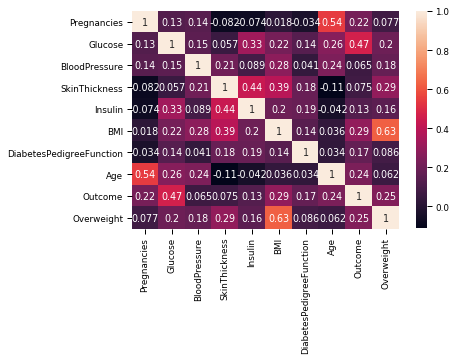

In [41]:
sns.set_palette("RdBu")
correlation=df.corr()
sns.heatmap(correlation, annot = True)
plt.show()

# Categorical Plots

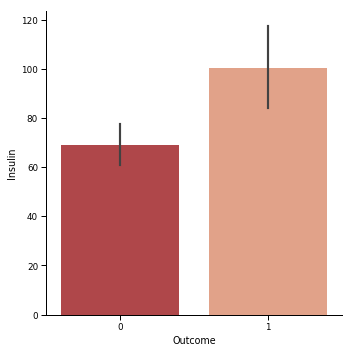

In [46]:
sns.catplot(x="Outcome",y="Insulin",data=df, kind="bar")
plt.show()

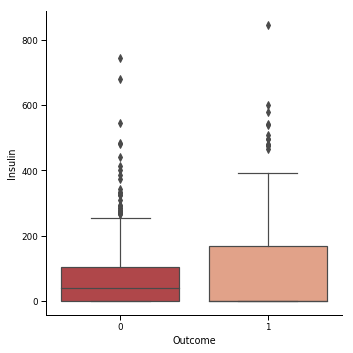

In [48]:
sns.catplot(x="Outcome",y="Insulin",data=df, kind="box")
plt.show()

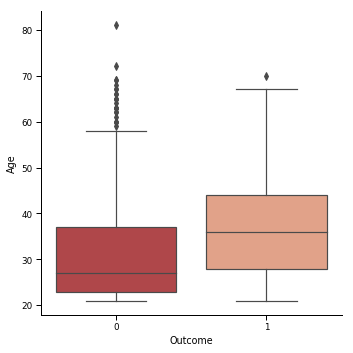

In [49]:
sns.catplot(x="Outcome",y="Age",data=df, kind="box")
plt.show()

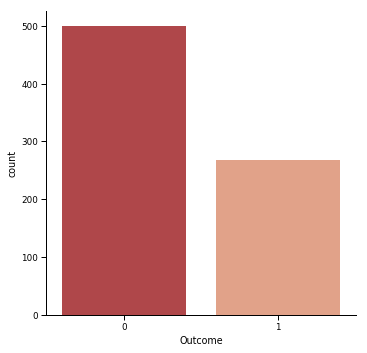

In [40]:
sns.catplot(x="Outcome",data=df, kind="count")
plt.show()

# Presets

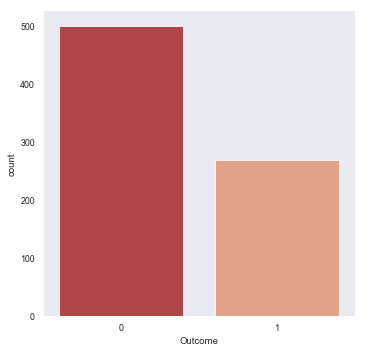

In [50]:
sns.set_style("dark")
sns.catplot(x="Outcome",data=df, kind="count")
plt.show()
## white, dark, whitegrid, darkgrid, ticks

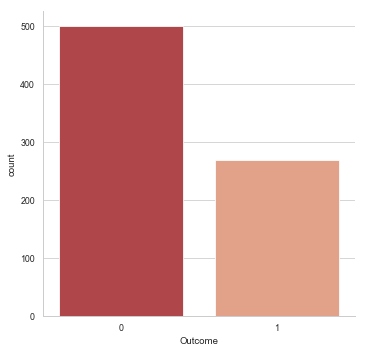

In [51]:
sns.set_style("whitegrid")
sns.catplot(x="Outcome",data=df, kind="count")
plt.show()
## white, dark, whitegrid, darkgrid, ticks

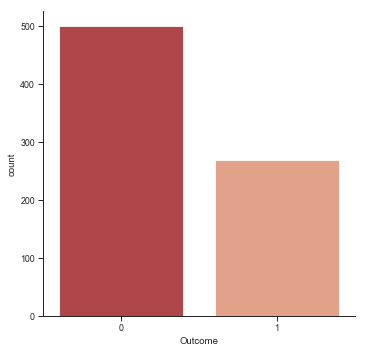

In [52]:
sns.set_style("ticks")
sns.catplot(x="Outcome",data=df, kind="count")
plt.show()
## white, dark, whitegrid, darkgrid, ticks

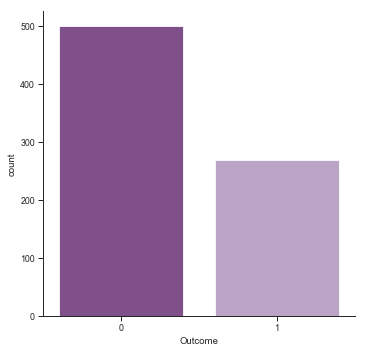

In [54]:
sns.set_palette("PRGn")
sns.catplot(x="Outcome",data=df, kind="count")
plt.show()
# categorical plotlarda “RdBu”, “PRGn”,”RdBu_r”,”PRGn_r”
# continuous plotlarda Greys, Blues, PuRd, GnBu

In [43]:
#sns.set_context("paper")
#plt.show()
# paper,poster, talk